In [1]:
!git clone https://github.com/abhishict/TextMiningProject.git

Cloning into 'TextMiningProject'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 7), reused 14 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 3.02 MiB | 16.65 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

In [2]:
df_reviews = pd.read_csv('/content/TextMiningProject/data/cleaned_dataset.csv')

In [3]:
df_reviews.head()

,Label,Description,Cleaned_Description,Article_Length
0,Environmental Concern,Brake pad dust can be more toxic than exhaust ...,brake pad dust toxic exhaust emission study say,8
1,Environmental Benefit,EVs and datacentres driving new global ‘age of...,datacentres driving global age electricity say...,7
2,Economic Challenge,EV drivers spend extra £85m on VAT when using ...,driver spend extra vat using public charger,7
3,Economic Challenge,UK used electric vehicle sales hit record last...,uk used sale hit record last price fell,8
4,Environmental Benefit,Promoting green growth does not make you an ‘e...,promoting green growth econutter way forward,6


In [4]:
df_reviews = df_reviews.dropna(subset=['Cleaned_Description'])

In [5]:
df_reviews['Label'].value_counts()

,count
Label,
Pro-EV,1297
Against-EV,911
Environmental Benefit,732
General Pro,720
General Against,410
Economic Challenge,397
Economic Advantage,394
Environmental Concern,309


In [6]:
df_reviews['Label'].unique()

array(['Environmental Concern', 'Environmental Benefit',
       'Economic Challenge', 'Economic Advantage', 'Pro-EV', 'Against-EV',
       'General Pro', 'General Against'], dtype=object)

In [10]:
positive_labels = ["Pro-EV", "General Pro", "Environmental Benefit", "Economic Advantage"]
df_reviews["Sentiment"] = df_reviews["Label"].apply(lambda x: "positive" if x in positive_labels else "negative")

In [11]:
df_reviews['Sentiment'].value_counts()

,count
Sentiment,
positive,3143
negative,2027


In [12]:
def get_label_type(label):
    if label in ["Environmental Concern", "Environmental Benefit"]:
        return "Environmental"
    elif label in ["Economic Challenge", "Economic Advantage"]:
        return "Economic"
    else:
        return "General"

In [58]:
df_reviews_filtered = df_reviews[df_reviews['Label'].isin([
    'Environmental Concern', 'Environmental Benefit',
    'Economic Challenge', 'Economic Advantage', 'Against-EV', 'Pro-EV'
])]

df_reviews_filtered['ReviewType'] = df_reviews_filtered['Label'].apply(get_label_type)
X = df_reviews_filtered["Cleaned_Description"]
y = df_reviews_filtered["ReviewType"]

# Step 2: Train-test split BEFORE oversampling (to avoid data leakage)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=500, min_df=10, max_df=0.85)
X_train_tfidf = vectorizer.fit_transform(X_train_raw)
X_test_tfidf = vectorizer.transform(X_test_raw)
feature_names = vectorizer.get_feature_names_out()

# Step 4: Apply oversampling on TF-IDF vectors
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_tfidf, y_train)


<ipython-input-58-aeae7938078f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_filtered['ReviewType'] = df_reviews_filtered['Label'].apply(get_label_type)


In [67]:
X_train_dense = X_train_resampled.toarray()
X_test_dense = X_test_tfidf.toarray()

# Create DataFrames with the same TF-IDF feature columns
df_train = pd.DataFrame(X_train_dense, columns=feature_names)
df_train["ReviewType"] = y_train_resampled

df_test = pd.DataFrame(X_test_dense, columns=feature_names)
df_test["ReviewType"] = y_test.values

In [68]:
df_train

,able,according,action,actually,add,adding,adoption,ago,agree,air,...,work,working,world,worst,worth,wrong,yes,yous,zero,ReviewType
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,General
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209548,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,General
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,General
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Environmental
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Environmental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Environmental
5294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Environmental
5295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Environmental
5296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Environmental


In [69]:
df_test

,able,according,action,actually,add,adding,adoption,ago,agree,air,...,work,working,world,worst,worth,wrong,yes,yous,zero,ReviewType
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Economic
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Environmental
2,0.0,0.0,0.0,0.0,0.0,0.399087,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,General
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,General
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,General
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.207078,0.0,0.0,0.0,0.000000,0.0,0.0,General
804,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.319063,0.0,0.0,General
805,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,General
806,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Economic


In [45]:
from sklearn.decomposition import TruncatedSVD

# Define number of components
n_components = 350  # You can tune this based on explained variance or empirically

# Initialize Truncated SVD
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit on resampled train data and transform both train and test
X_train_pca = svd.fit_transform(X_train_resampled)
X_test_pca = svd.transform(X_test_tfidf)

# Optional: check explained variance
explained_var = svd.explained_variance_ratio_.sum()
print(f"Total variance explained by {n_components} components: {explained_var:.2%}")

Total variance explained by 350 components: 93.11%


### Naive Bayes

In [46]:
# Naïve Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [47]:
# Predictions
y_pred = nb_model.predict(X_test_tfidf)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {100*accuracy:.2f}%")

Classification Report:
                precision    recall  f1-score   support

     Economic       0.44      0.59      0.50       158
Environmental       0.64      0.57      0.60       208
      General       0.89      0.82      0.86       442

     accuracy                           0.71       808
    macro avg       0.66      0.66      0.65       808
 weighted avg       0.74      0.71      0.72       808

Accuracy: 71.29%


<Figure size 1000x700 with 0 Axes>

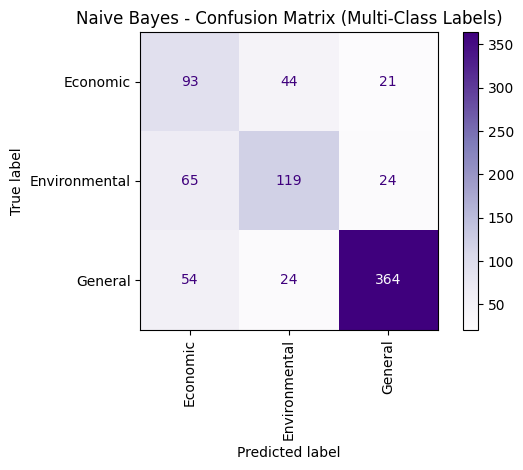

In [48]:
labels = sorted(df_reviews_filtered["ReviewType"].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(10, 7))
disp.plot(cmap="Purples", xticks_rotation=90)
plt.title("Naive Bayes - Confusion Matrix (Multi-Class Labels)")
plt.tight_layout()
plt.show()

### DECISION TREES


=== Decision Tree (max_depth=3) ===
Accuracy: 0.63
Classification Report:
               precision    recall  f1-score   support

     Economic       0.51      0.32      0.39       158
Environmental       0.45      0.50      0.47       208
      General       0.74      0.81      0.77       442

     accuracy                           0.63       808
    macro avg       0.57      0.54      0.55       808
 weighted avg       0.62      0.63      0.62       808



<Figure size 1000x700 with 0 Axes>

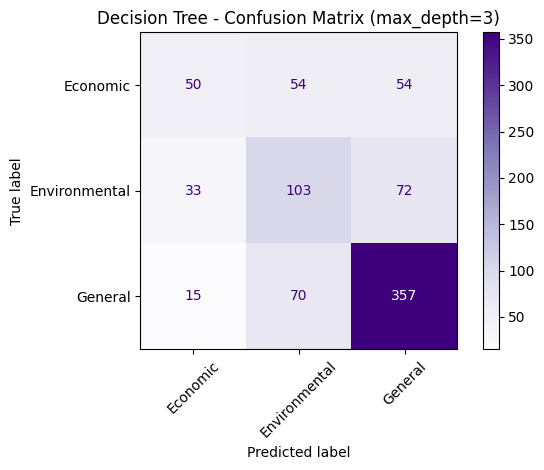

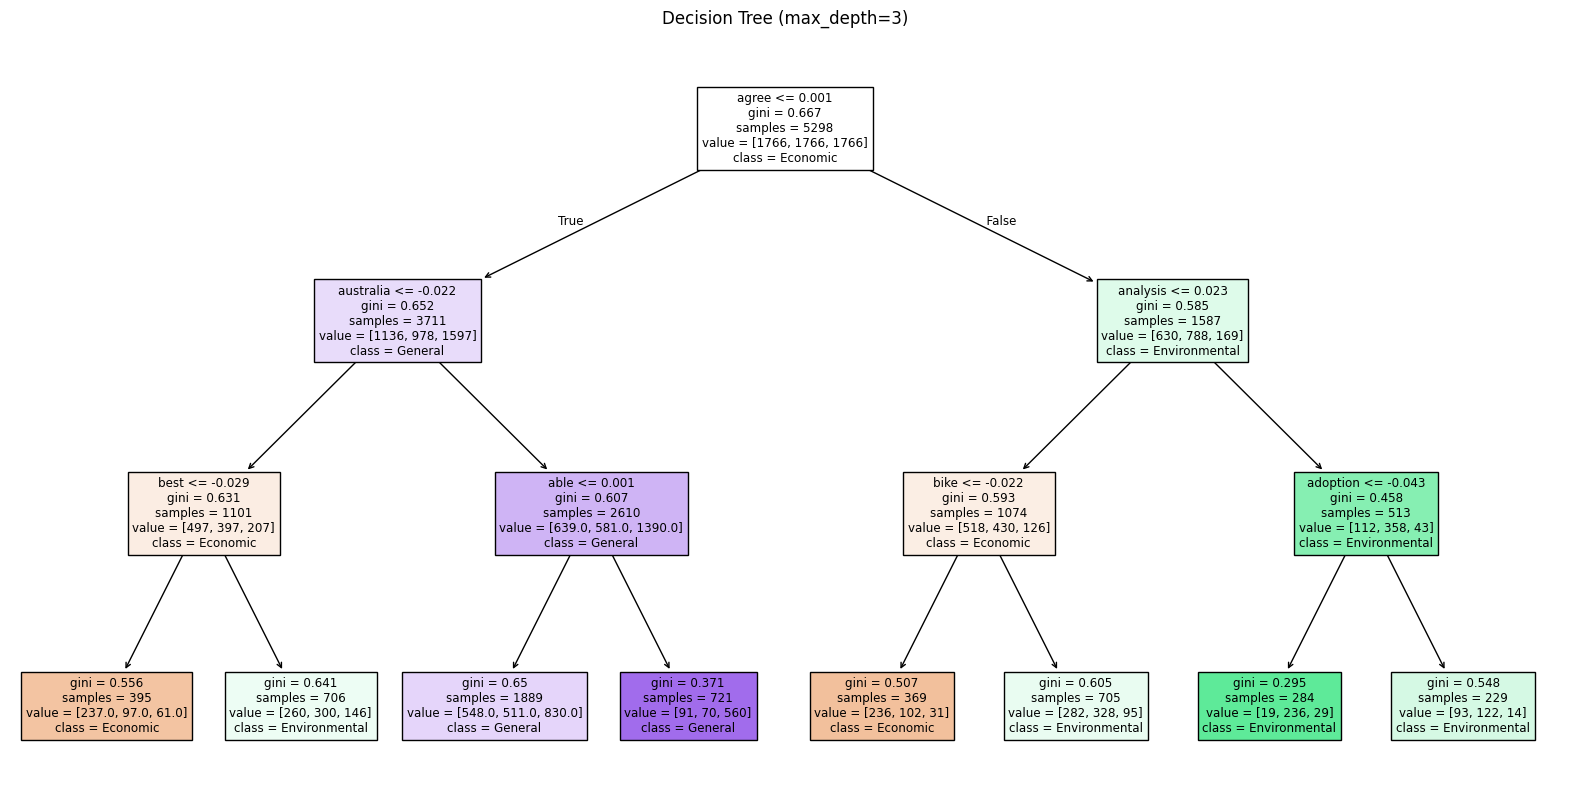


=== Decision Tree (max_depth=4) ===
Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

     Economic       0.32      0.56      0.40       158
Environmental       0.49      0.32      0.39       208
      General       0.81      0.72      0.76       442

     accuracy                           0.58       808
    macro avg       0.54      0.53      0.52       808
 weighted avg       0.63      0.58      0.59       808



<Figure size 1000x700 with 0 Axes>

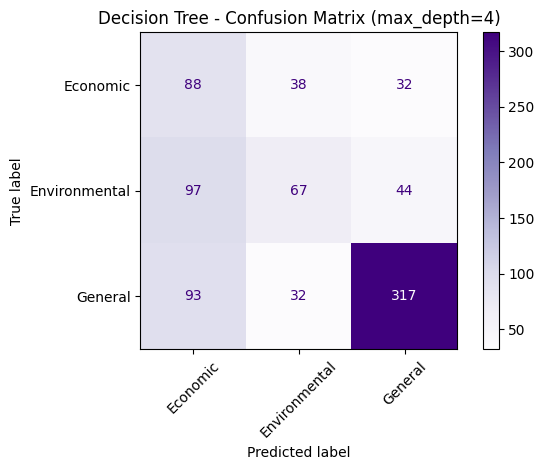

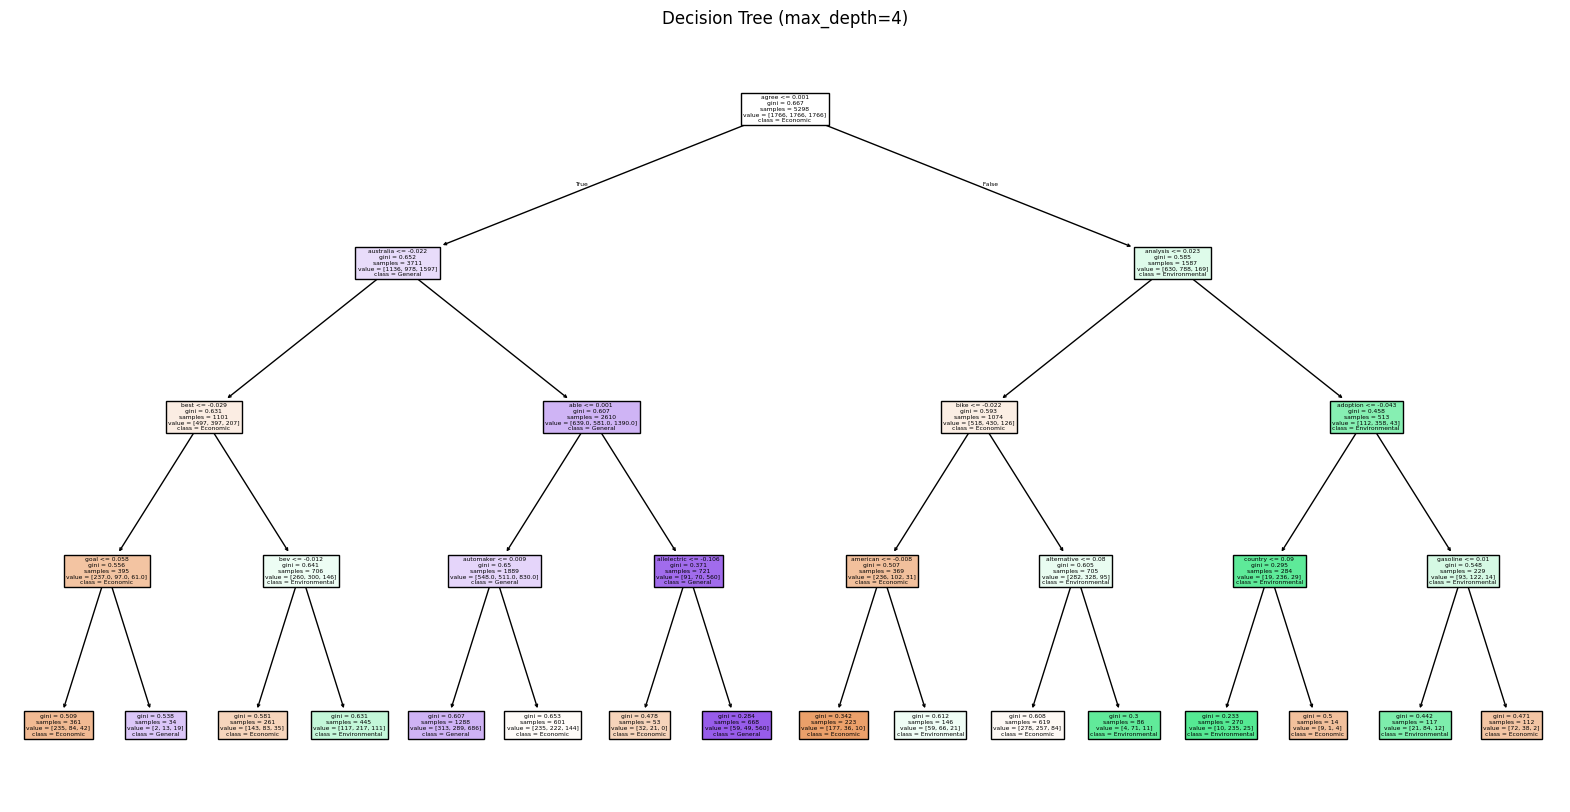


=== Decision Tree (max_depth=5) ===
Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

     Economic       0.34      0.65      0.45       158
Environmental       0.52      0.37      0.43       208
      General       0.83      0.68      0.75       442

     accuracy                           0.59       808
    macro avg       0.57      0.57      0.54       808
 weighted avg       0.65      0.59      0.61       808



<Figure size 1000x700 with 0 Axes>

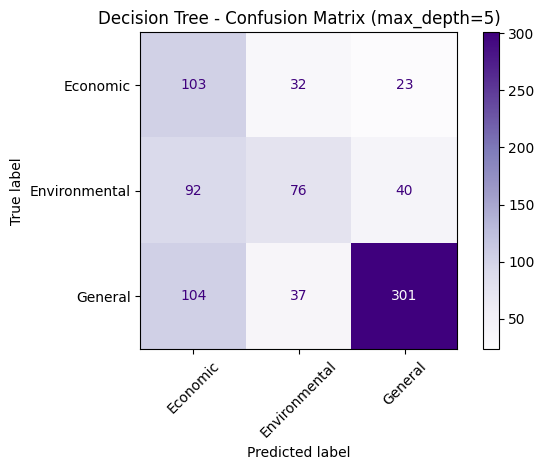

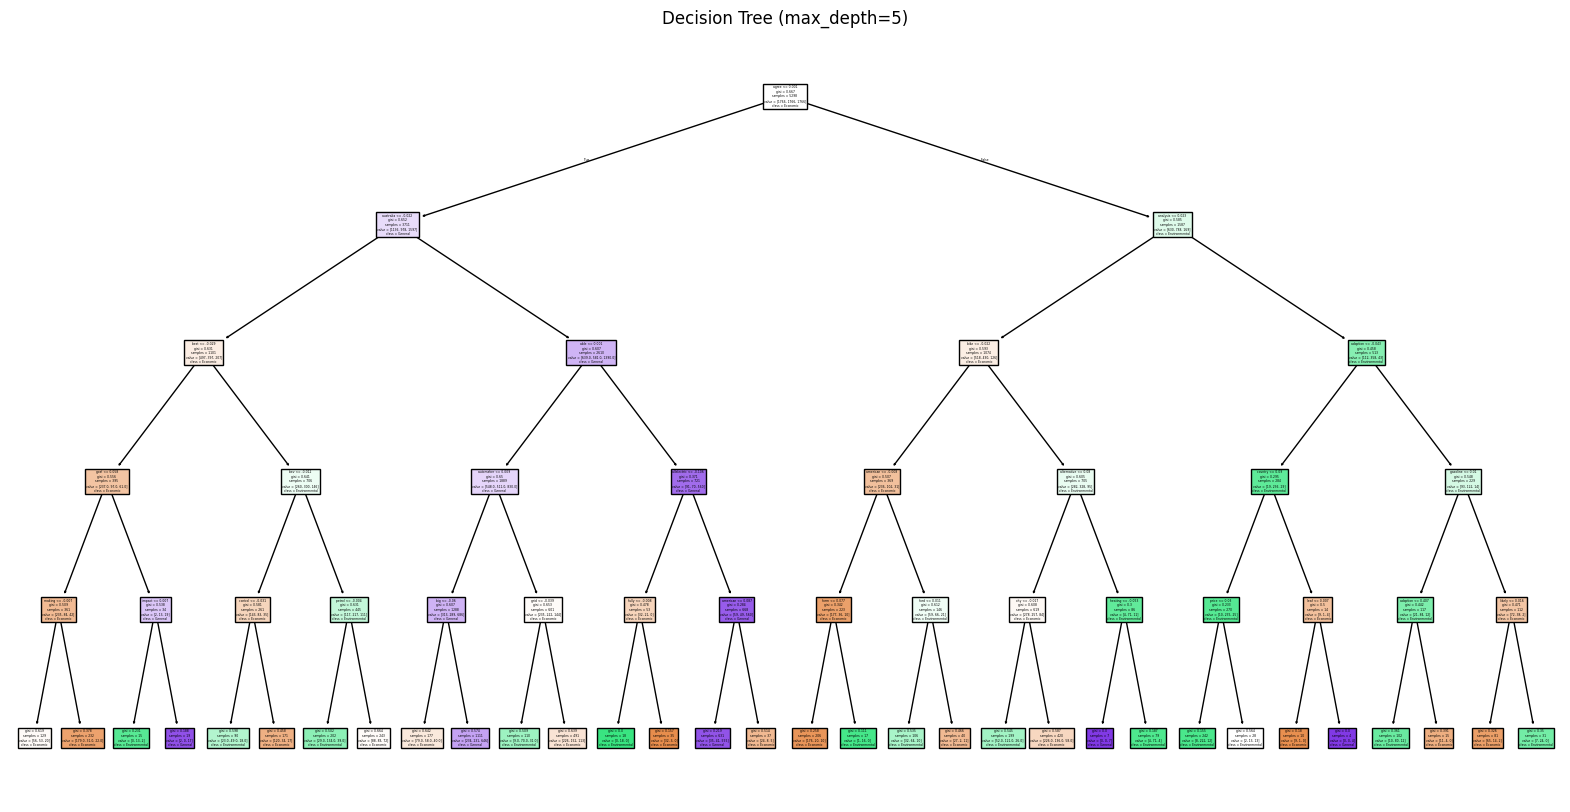


=== Decision Tree (max_depth=6) ===
Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

     Economic       0.36      0.55      0.44       158
Environmental       0.42      0.46      0.44       208
      General       0.83      0.64      0.73       442

     accuracy                           0.58       808
    macro avg       0.54      0.55      0.53       808
 weighted avg       0.63      0.58      0.60       808



<Figure size 1000x700 with 0 Axes>

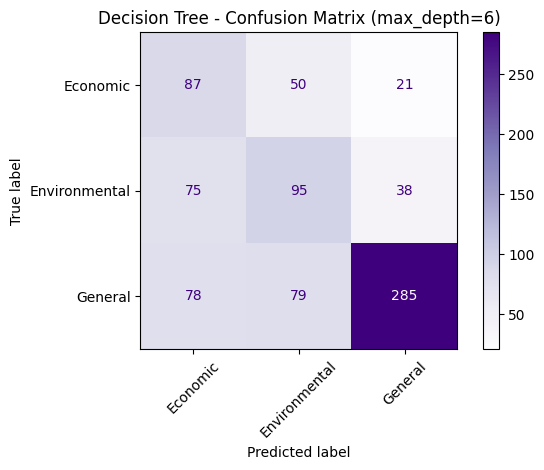

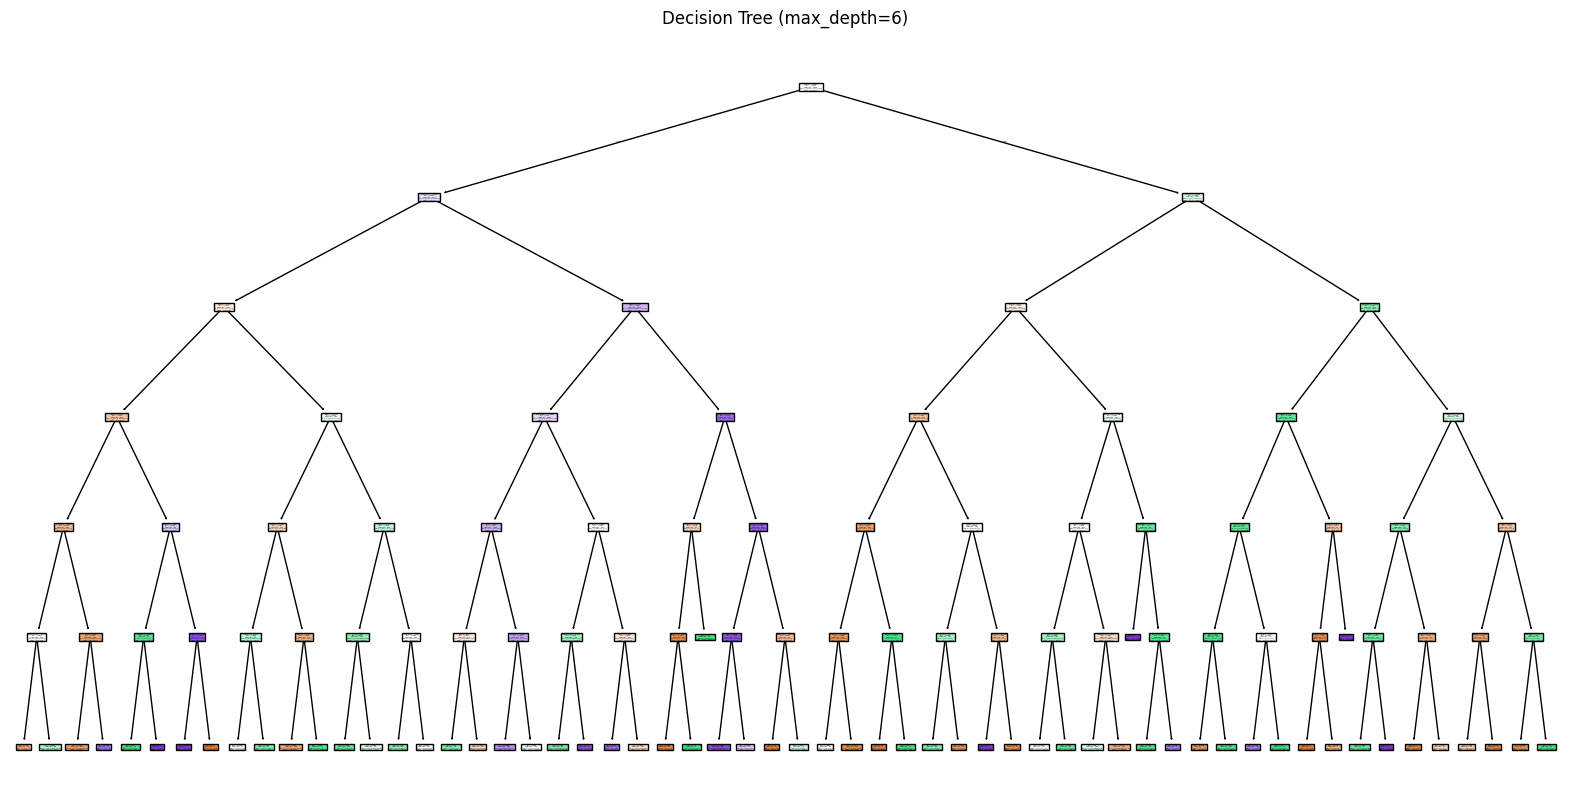


=== Decision Tree (max_depth=11) ===
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

     Economic       0.46      0.41      0.43       158
Environmental       0.49      0.43      0.46       208
      General       0.76      0.83      0.79       442

     accuracy                           0.64       808
    macro avg       0.57      0.56      0.56       808
 weighted avg       0.63      0.64      0.64       808



<Figure size 1000x700 with 0 Axes>

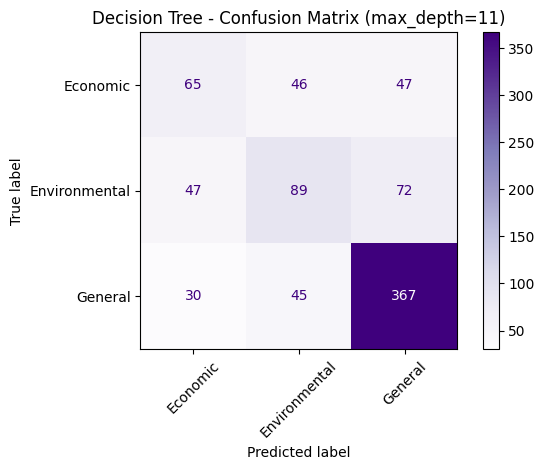

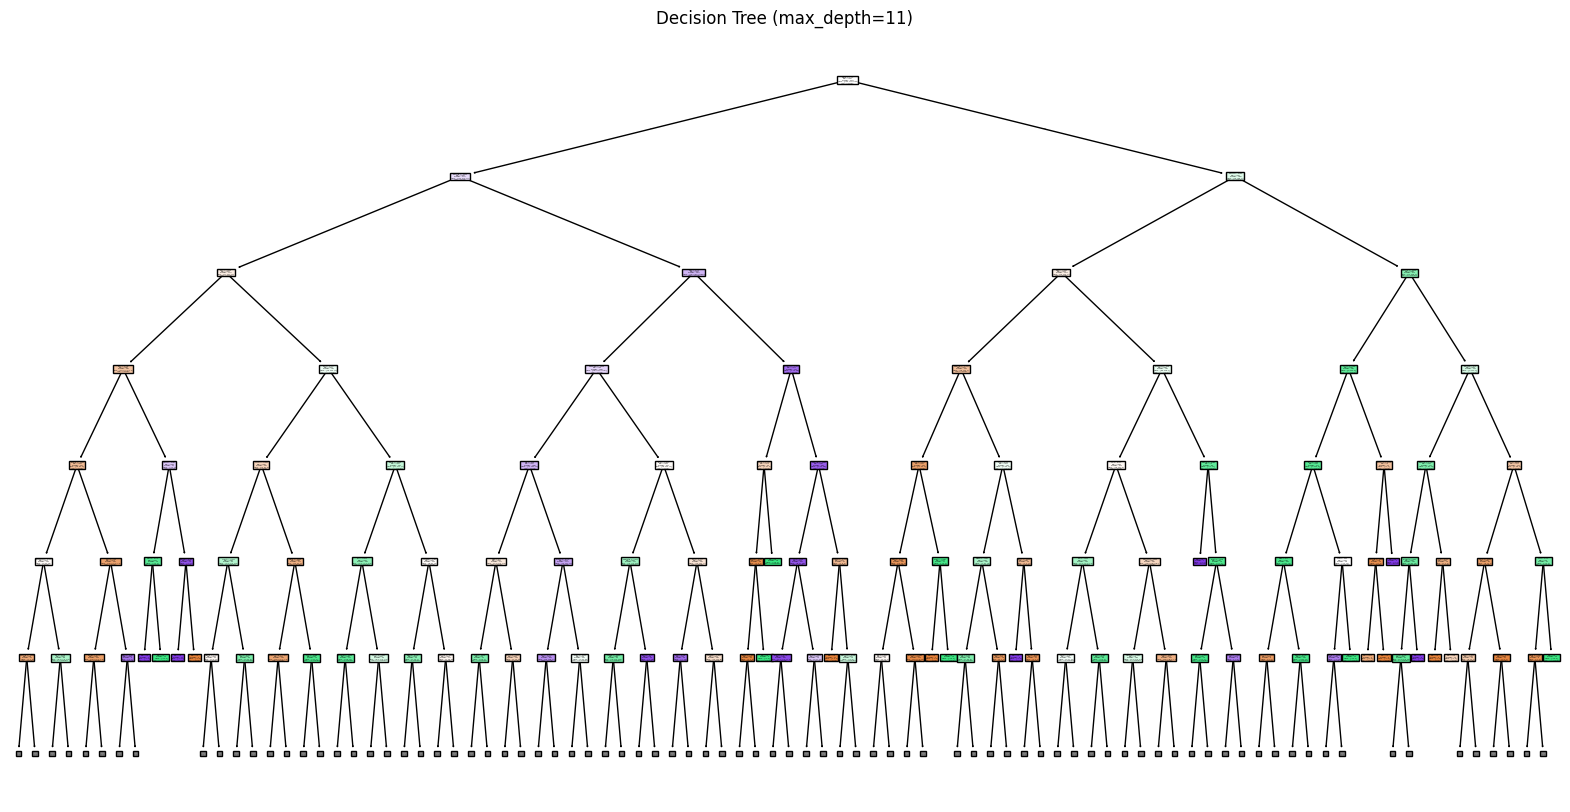


=== Decision Tree (max_depth=13) ===
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

     Economic       0.43      0.41      0.42       158
Environmental       0.51      0.42      0.46       208
      General       0.75      0.83      0.79       442

     accuracy                           0.64       808
    macro avg       0.56      0.55      0.56       808
 weighted avg       0.63      0.64      0.63       808



<Figure size 1000x700 with 0 Axes>

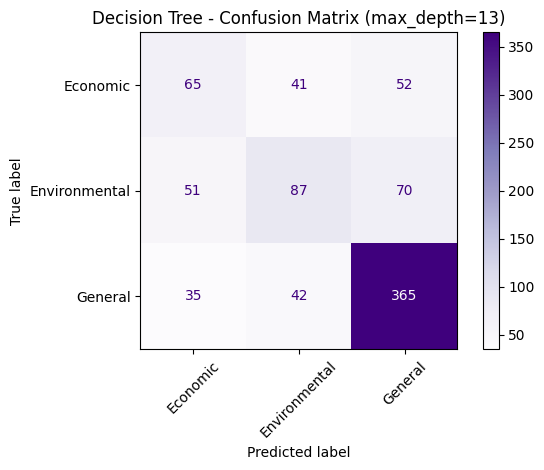

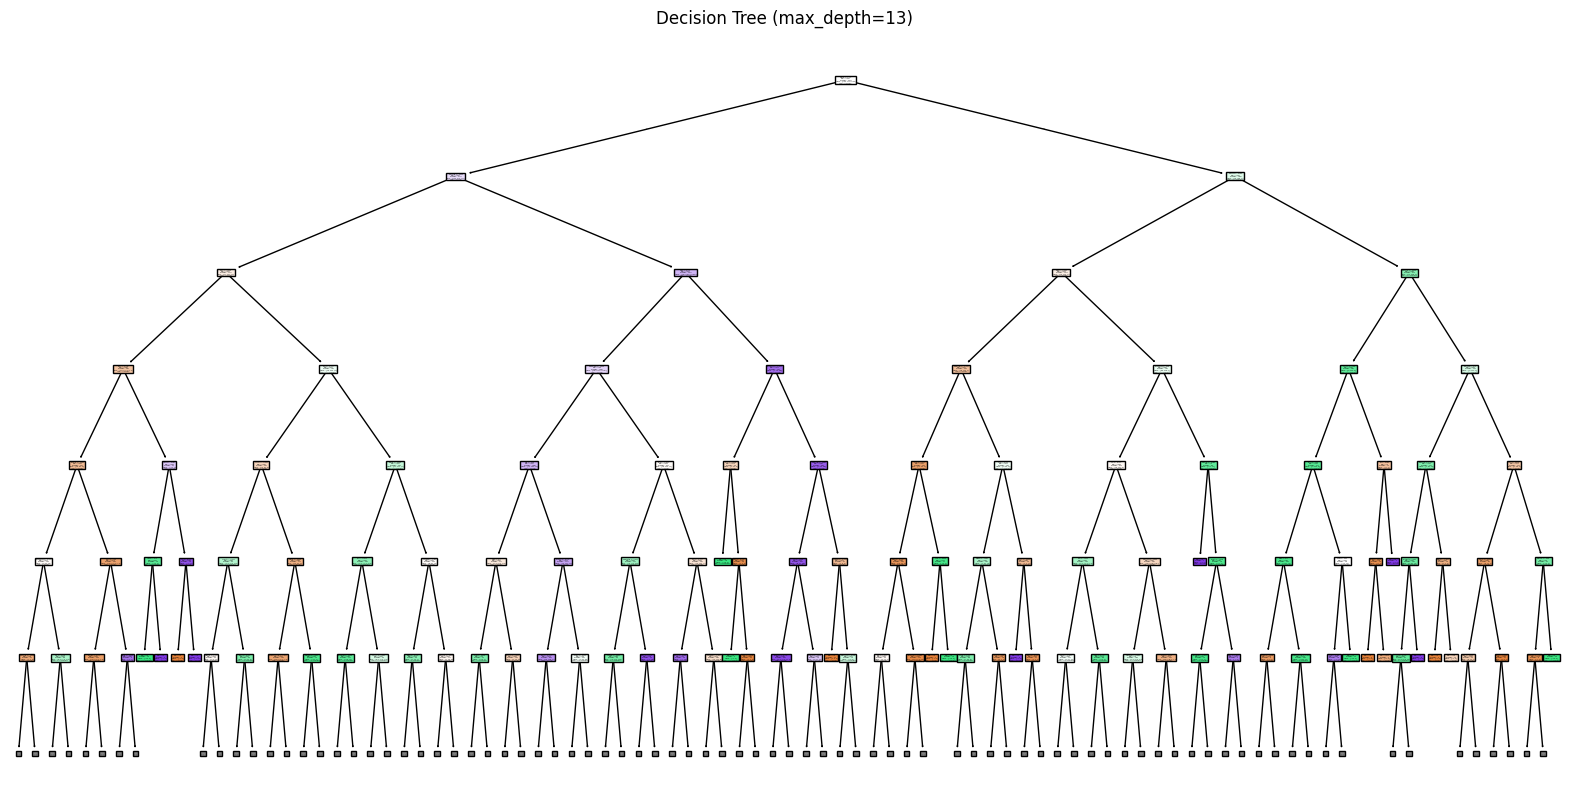


=== Decision Tree (max_depth=15) ===
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

     Economic       0.44      0.42      0.43       158
Environmental       0.50      0.40      0.44       208
      General       0.76      0.84      0.80       442

     accuracy                           0.65       808
    macro avg       0.57      0.55      0.56       808
 weighted avg       0.63      0.65      0.64       808



<Figure size 1000x700 with 0 Axes>

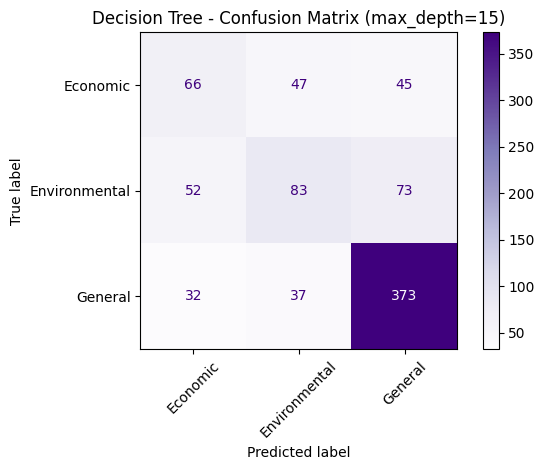

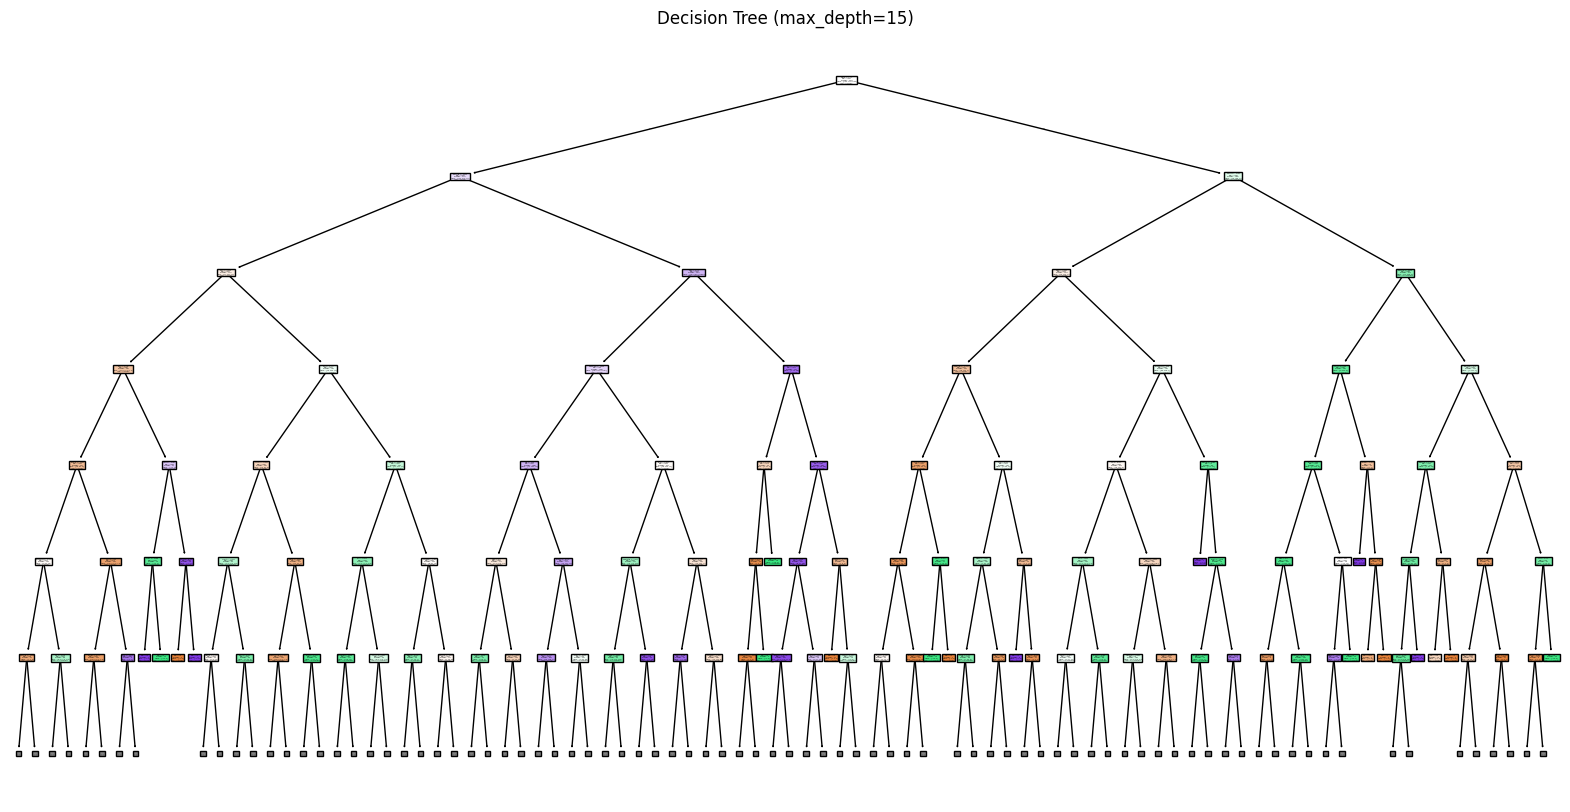


=== Decision Tree (max_depth=20) ===
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

     Economic       0.43      0.39      0.41       158
Environmental       0.49      0.43      0.46       208
      General       0.76      0.83      0.79       442

     accuracy                           0.64       808
    macro avg       0.56      0.55      0.55       808
 weighted avg       0.63      0.64      0.63       808



<Figure size 1000x700 with 0 Axes>

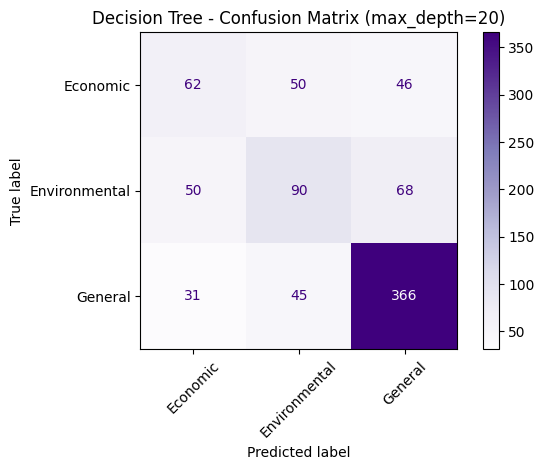

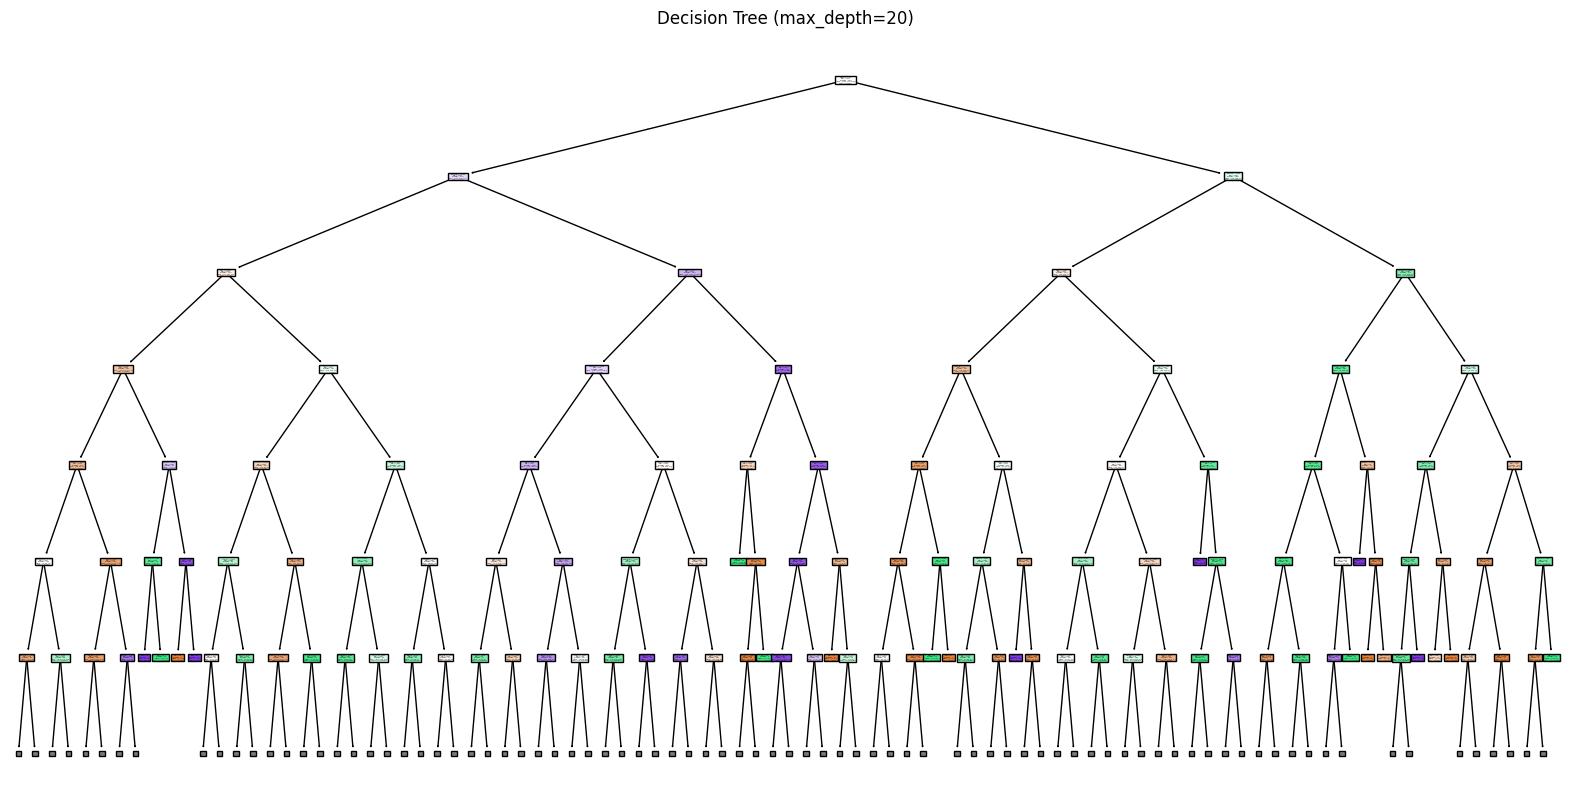

In [78]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train_pca, y_train_resampled, X_test_pca, y_test, df_reviews_filtered, and feature_names are already defined

depths = [3, 4, 5, 6, 11, 13, 15, 20]
results = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_pca, y_train_resampled)
    y_pred = clf.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    # Store metrics
    results.append({
        "Max Depth": depth,
        "Accuracy": round(acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    })

    # Print results
    print(f"\n=== Decision Tree (max_depth={depth}) ===")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    labels = sorted(df_reviews_filtered["ReviewType"].unique())
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    plt.figure(figsize=(10, 7))
    disp.plot(cmap="Purples", xticks_rotation=45)
    plt.title(f"Decision Tree - Confusion Matrix (max_depth={depth})")
    plt.tight_layout()
    plt.show()

    # Plot tree
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=feature_names, class_names=clf.classes_, filled=True, max_depth=6)
    plt.title(f"Decision Tree (max_depth={depth})")
    plt.show()

# Create results DataFrame
results_df = pd.DataFrame(results)


In [72]:
results_df

,Max Depth,Accuracy,Precision,Recall,F1 Score
0,3,0.6312,0.6209,0.6312,0.6205
1,6,0.5780,0.6333,0.5780,0.5954
2,11,0.6448,0.6299,0.6448,0.6355
3,13,0.6399,0.6259,0.6399,0.6306
4,15,0.6460,0.6295,0.6460,0.6351
5,20,0.6411,0.6271,0.6411,0.6328


### SVM


=== SVM Kernel=linear, C=0.1) ===
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

     Economic       0.40      0.73      0.52       158
Environmental       0.65      0.46      0.54       208
      General       0.91      0.76      0.83       442

     accuracy                           0.68       808
    macro avg       0.65      0.65      0.63       808
 weighted avg       0.74      0.68      0.69       808



<Figure size 1000x700 with 0 Axes>

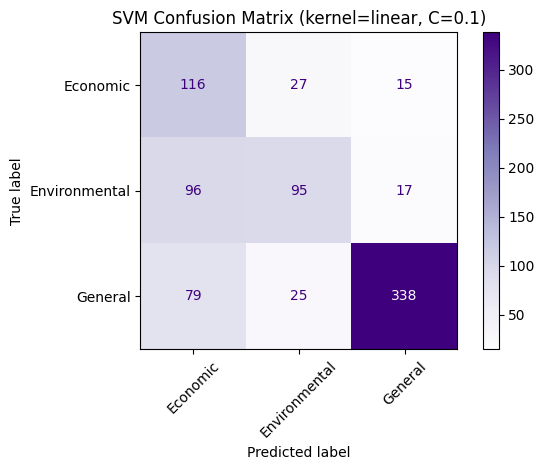


=== SVM Kernel=linear, C=0.5) ===
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

     Economic       0.39      0.63      0.48       158
Environmental       0.61      0.54      0.57       208
      General       0.91      0.75      0.83       442

     accuracy                           0.68       808
    macro avg       0.64      0.64      0.63       808
 weighted avg       0.73      0.68      0.69       808



<Figure size 1000x700 with 0 Axes>

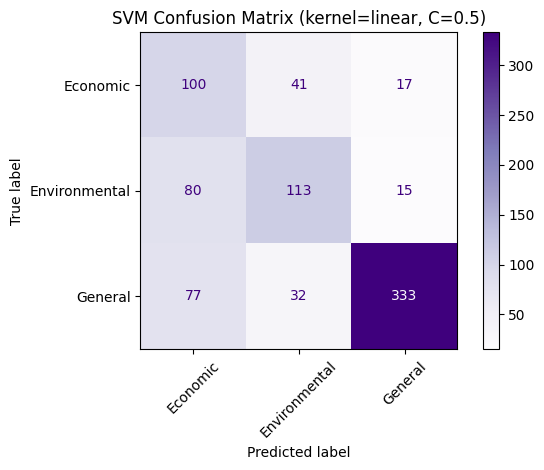


=== SVM Kernel=linear, C=1) ===
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

     Economic       0.39      0.61      0.47       158
Environmental       0.63      0.57      0.60       208
      General       0.91      0.76      0.83       442

     accuracy                           0.68       808
    macro avg       0.64      0.65      0.63       808
 weighted avg       0.74      0.68      0.70       808



<Figure size 1000x700 with 0 Axes>

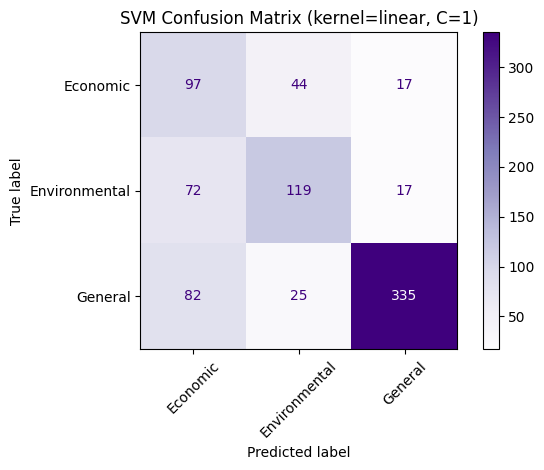


=== SVM Kernel=rbf, C=0.05) ===
Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

     Economic       0.31      0.90      0.46       158
Environmental       0.67      0.25      0.36       208
      General       0.93      0.57      0.71       442

     accuracy                           0.55       808
    macro avg       0.64      0.57      0.51       808
 weighted avg       0.74      0.55      0.57       808



<Figure size 1000x700 with 0 Axes>

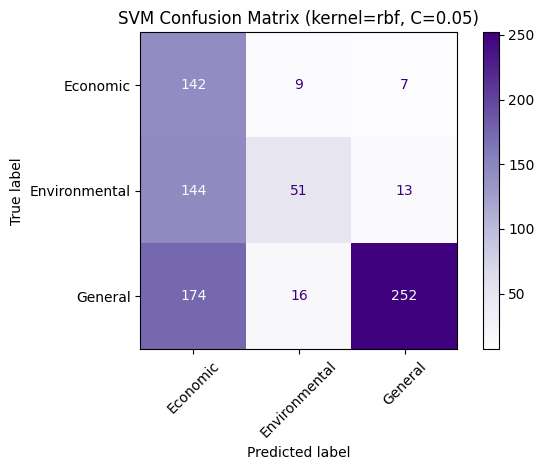


=== SVM Kernel=rbf, C=0.1) ===
Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

     Economic       0.45      0.75      0.57       158
Environmental       0.65      0.41      0.51       208
      General       0.90      0.84      0.87       442

     accuracy                           0.71       808
    macro avg       0.67      0.67      0.65       808
 weighted avg       0.75      0.71      0.71       808



<Figure size 1000x700 with 0 Axes>

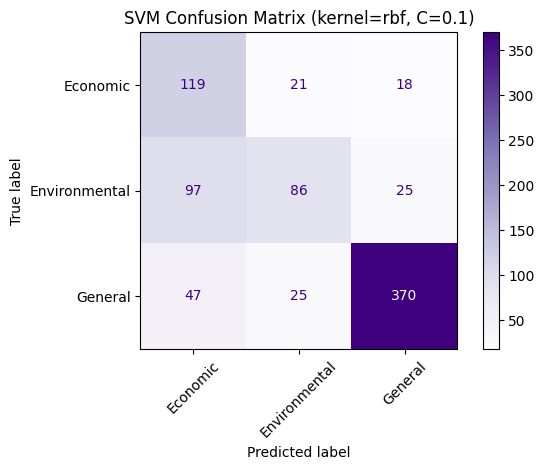


=== SVM Kernel=rbf, C=0.5) ===
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

     Economic       0.53      0.56      0.55       158
Environmental       0.64      0.58      0.61       208
      General       0.89      0.91      0.90       442

     accuracy                           0.76       808
    macro avg       0.69      0.68      0.69       808
 weighted avg       0.76      0.76      0.76       808



<Figure size 1000x700 with 0 Axes>

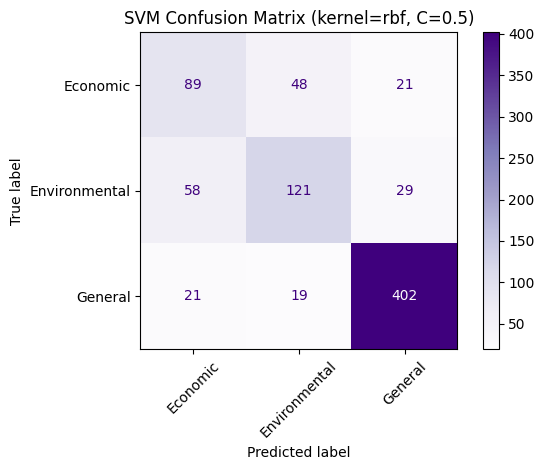


=== SVM Kernel=rbf, C=1) ===
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

     Economic       0.57      0.53      0.55       158
Environmental       0.67      0.63      0.65       208
      General       0.88      0.93      0.91       442

     accuracy                           0.77       808
    macro avg       0.71      0.70      0.70       808
 weighted avg       0.77      0.77      0.77       808



<Figure size 1000x700 with 0 Axes>

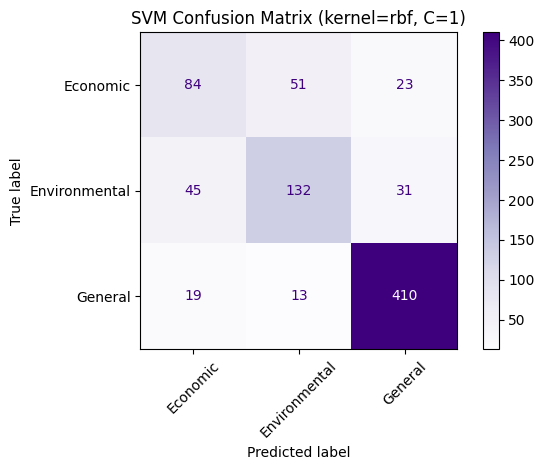


=== SVM Kernel=poly, C=0.05) ===
Accuracy: 0.31
Classification Report:
               precision    recall  f1-score   support

     Economic       0.21      0.87      0.34       158
Environmental       0.64      0.31      0.42       208
      General       1.00      0.11      0.20       442

     accuracy                           0.31       808
    macro avg       0.62      0.43      0.32       808
 weighted avg       0.75      0.31      0.28       808



<Figure size 1000x700 with 0 Axes>

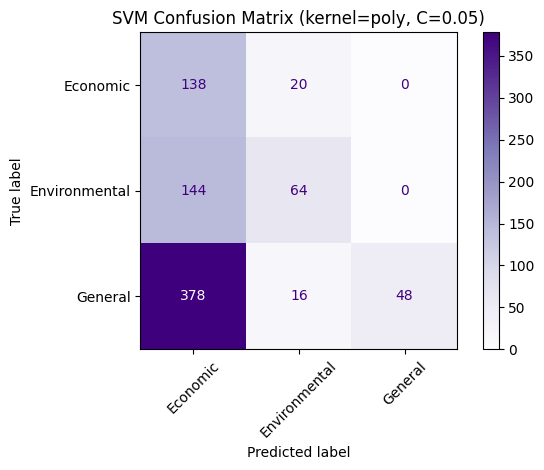


=== SVM Kernel=poly, C=0.1) ===
Accuracy: 0.40
Classification Report:
               precision    recall  f1-score   support

     Economic       0.25      0.80      0.38       158
Environmental       0.52      0.47      0.49       208
      General       0.96      0.23      0.37       442

     accuracy                           0.40       808
    macro avg       0.58      0.50      0.41       808
 weighted avg       0.71      0.40      0.40       808



<Figure size 1000x700 with 0 Axes>

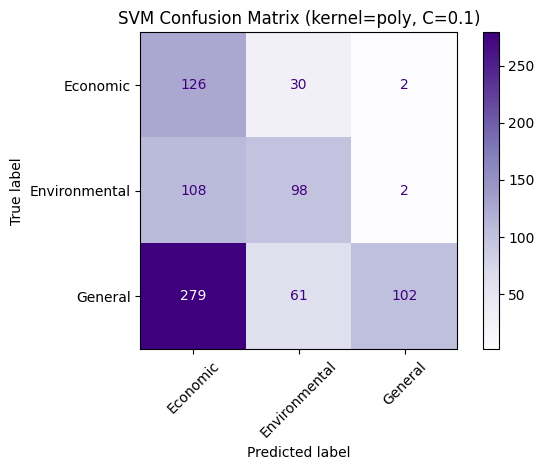


=== SVM Kernel=poly, C=0.5) ===
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

     Economic       0.60      0.39      0.47       158
Environmental       0.69      0.45      0.55       208
      General       0.76      0.97      0.85       442

     accuracy                           0.73       808
    macro avg       0.68      0.61      0.62       808
 weighted avg       0.71      0.73      0.70       808



<Figure size 1000x700 with 0 Axes>

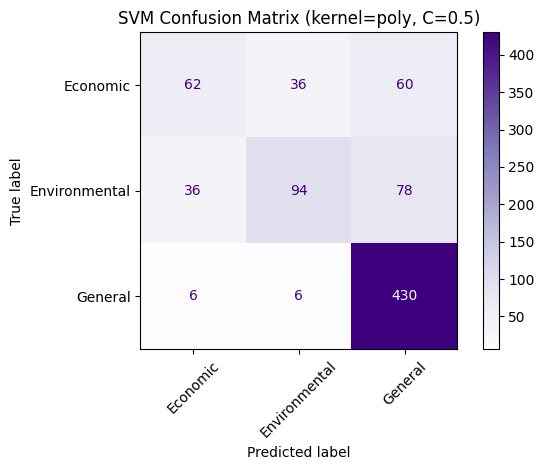


=== SVM Kernel=poly, C=1) ===
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

     Economic       0.60      0.37      0.46       158
Environmental       0.67      0.45      0.54       208
      General       0.75      0.98      0.85       442

     accuracy                           0.72       808
    macro avg       0.68      0.60      0.62       808
 weighted avg       0.70      0.72      0.69       808



<Figure size 1000x700 with 0 Axes>

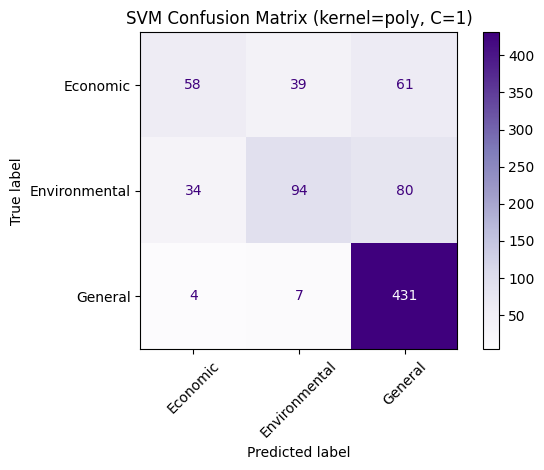

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Store evaluation results
svm_results = []

# Evaluate SVM for various kernel and C combinations
kernel_cost_combinations = [
    ("linear", 0.1),
    ("linear", 0.5),
    ("linear", 1),
    ("rbf", 0.05),
    ("rbf", 0.1),
    ("rbf", 0.5),
    ("rbf", 1),
    ("poly", 0.05),
    ("poly", 0.1),
    ("poly", 0.5),
    ("poly", 1)
]

for kernel, C in kernel_cost_combinations:
    clf = SVC(kernel=kernel, C=C, probability=True, random_state=42)
    clf.fit(X_train_pca, y_train_resampled)
    y_pred = clf.predict(X_test_pca)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"\n=== SVM Kernel={kernel}, C={C}) ===")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Save results
    svm_results.append({
        "Kernel": kernel,
        "C": C,
        "Accuracy": round(acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    })

    # Plot confusion matrix
    labels = sorted(df_reviews_filtered["ReviewType"].unique())
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    plt.figure(figsize=(10, 7))
    disp.plot(cmap="Purples", xticks_rotation=45)
    plt.title(f"SVM Confusion Matrix (kernel={kernel}, C={C})")
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame
svm_results_df = pd.DataFrame(svm_results)


In [75]:
svm_results_df

,Kernel,C,Accuracy,Precision,Recall,F1 Score
0,linear,0.10,0.6795,0.7440,0.6795,0.6942
1,linear,0.50,0.6757,0.7316,0.6757,0.6934
2,linear,1.00,0.6819,0.7351,0.6819,0.6994
3,rbf,0.05,0.5507,0.7399,0.5507,0.5685
4,rbf,0.10,0.7116,0.7463,0.7116,0.7142
5,rbf,0.50,0.7574,0.7558,0.7574,0.7560
6,rbf,1.00,0.7748,0.7677,0.7748,0.7707
7,poly,0.05,0.3094,0.7527,0.3094,0.2801
8,poly,0.10,0.4035,0.7079,0.4035,0.4042
9,poly,0.50,0.7252,0.7086,0.7252,0.6990


### Sentiment Analysis

In [39]:
df_sentiment_data = df_reviews[df_reviews['Label'].isin(['Economic Advantage', 'Economic Challenge'])]
X = df_sentiment_data["Cleaned_Description"]
y = df_sentiment_data["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 1: TF-IDF vectorization BEFORE oversampling
vectorizer = TfidfVectorizer(stop_words='english', max_features=100, min_df=10, max_df=0.85)
Xsent_train_tfidf = vectorizer.fit_transform(X_train)
Xsent_test_tfidf = vectorizer.transform(X_test)
feature_names = vectorizer.get_feature_names_out()

ros = RandomOverSampler(random_state=42)
Xsent_train_tfidf, y_train = ros.fit_resample(Xsent_train_tfidf, y_train)

In [40]:
from sklearn.decomposition import TruncatedSVD

# Define number of components
n_components = 90  # You can tune this based on explained variance or empirically

# Initialize Truncated SVD
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit on resampled train data and transform both train and test
X_train_pca_sent = svd.fit_transform(Xsent_train_tfidf)
X_test_pca_sent = svd.transform(Xsent_test_tfidf)

# Optional: check explained variance
explained_var = svd.explained_variance_ratio_.sum()
print(f"Total variance explained by {n_components} components: {explained_var:.2%}")

Total variance explained by 90 components: 99.63%



=== SVM (kernel=linear, C=0.1) ===
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.28      0.40        80
    positive       0.55      0.90      0.68        79

    accuracy                           0.58       159
   macro avg       0.64      0.59      0.54       159
weighted avg       0.64      0.58      0.54       159



<Figure size 600x500 with 0 Axes>

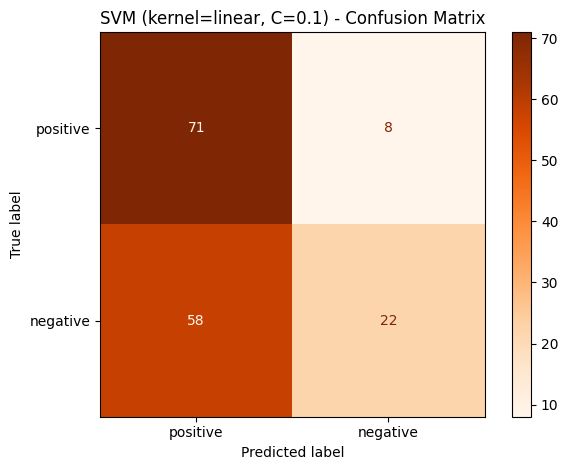


=== SVM (kernel=linear, C=0.5) ===
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

    negative       0.58      0.60      0.59        80
    positive       0.58      0.56      0.57        79

    accuracy                           0.58       159
   macro avg       0.58      0.58      0.58       159
weighted avg       0.58      0.58      0.58       159



<Figure size 600x500 with 0 Axes>

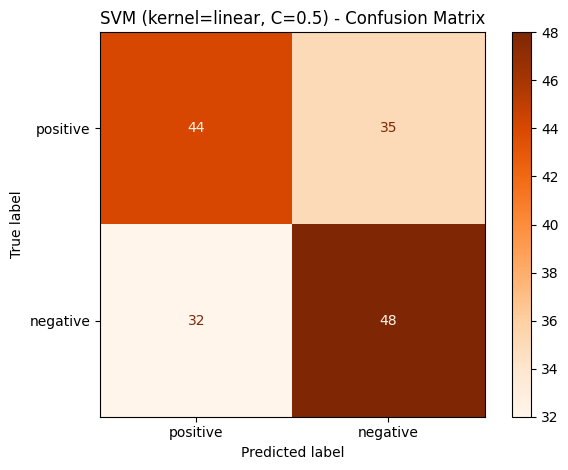


=== SVM (kernel=linear, C=1) ===
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

    negative       0.55      0.60      0.57        80
    positive       0.56      0.51      0.53        79

    accuracy                           0.55       159
   macro avg       0.55      0.55      0.55       159
weighted avg       0.55      0.55      0.55       159



<Figure size 600x500 with 0 Axes>

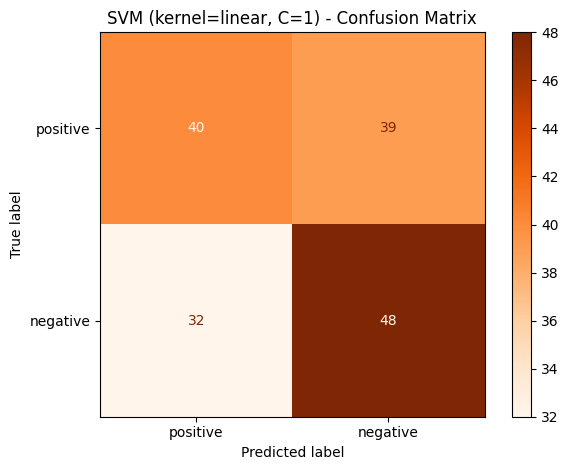


=== SVM (kernel=rbf, C=0.05) ===
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.36      0.46        80
    positive       0.55      0.80      0.65        79

    accuracy                           0.58       159
   macro avg       0.60      0.58      0.56       159
weighted avg       0.60      0.58      0.56       159



<Figure size 600x500 with 0 Axes>

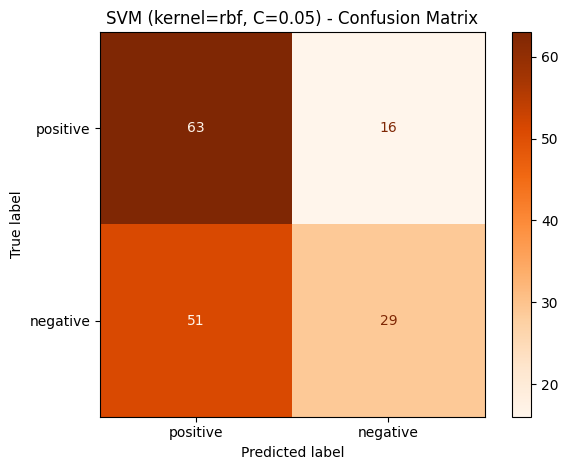


=== SVM (kernel=rbf, C=0.1) ===
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.36      0.46        80
    positive       0.55      0.80      0.65        79

    accuracy                           0.58       159
   macro avg       0.60      0.58      0.56       159
weighted avg       0.60      0.58      0.56       159



<Figure size 600x500 with 0 Axes>

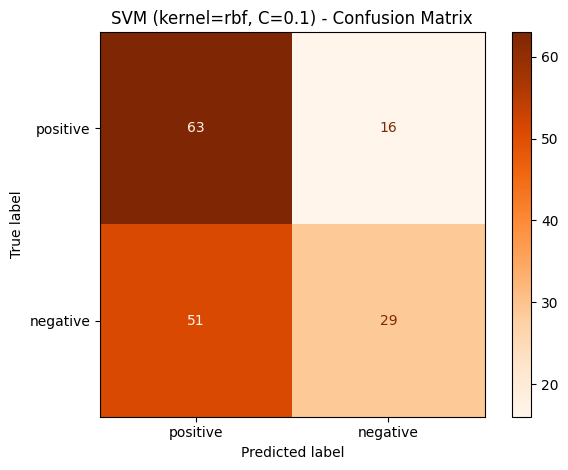


=== SVM (kernel=rbf, C=0.5) ===
Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

    negative       0.63      0.55      0.59        80
    positive       0.60      0.67      0.63        79

    accuracy                           0.61       159
   macro avg       0.61      0.61      0.61       159
weighted avg       0.61      0.61      0.61       159



<Figure size 600x500 with 0 Axes>

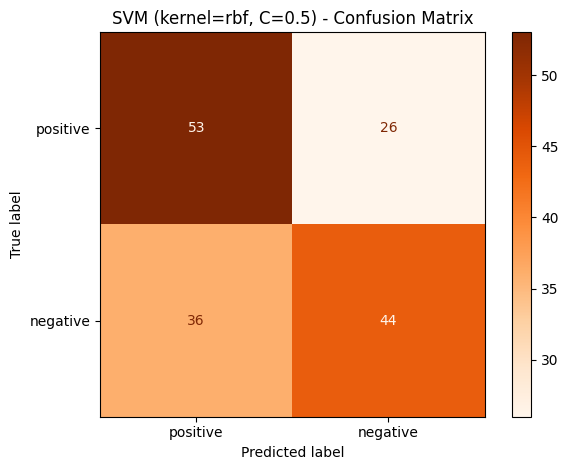


=== SVM (kernel=rbf, C=1) ===
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

    negative       0.57      0.62      0.60        80
    positive       0.58      0.52      0.55        79

    accuracy                           0.57       159
   macro avg       0.57      0.57      0.57       159
weighted avg       0.57      0.57      0.57       159



<Figure size 600x500 with 0 Axes>

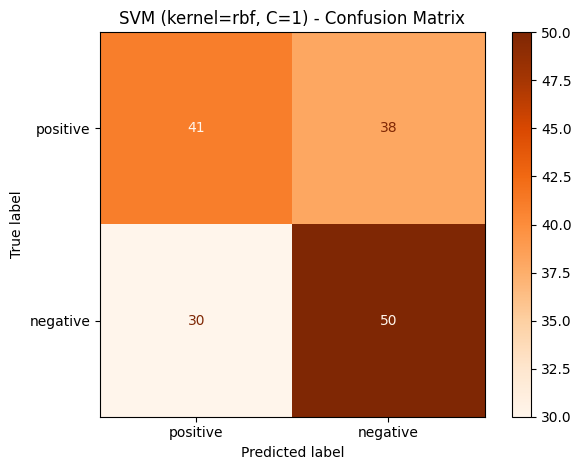


=== SVM (kernel=poly, C=0.05) ===
Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.21      0.33        80
    positive       0.53      0.91      0.67        79

    accuracy                           0.56       159
   macro avg       0.62      0.56      0.50       159
weighted avg       0.62      0.56      0.50       159



<Figure size 600x500 with 0 Axes>

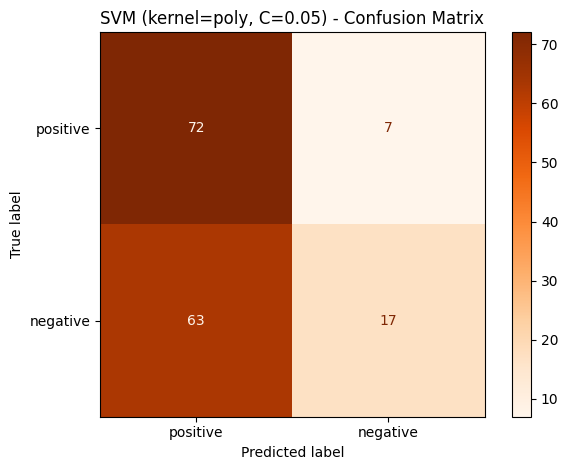


=== SVM (kernel=poly, C=0.1) ===
Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.21      0.33        80
    positive       0.53      0.91      0.67        79

    accuracy                           0.56       159
   macro avg       0.62      0.56      0.50       159
weighted avg       0.62      0.56      0.50       159



<Figure size 600x500 with 0 Axes>

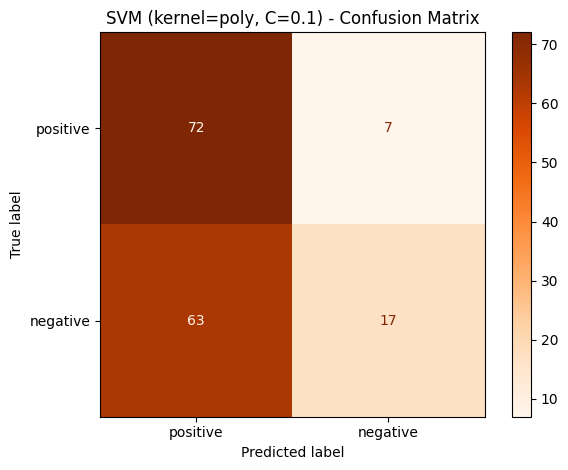


=== SVM (kernel=poly, C=0.5) ===
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

    negative       0.55      0.59      0.57        80
    positive       0.55      0.51      0.53        79

    accuracy                           0.55       159
   macro avg       0.55      0.55      0.55       159
weighted avg       0.55      0.55      0.55       159



<Figure size 600x500 with 0 Axes>

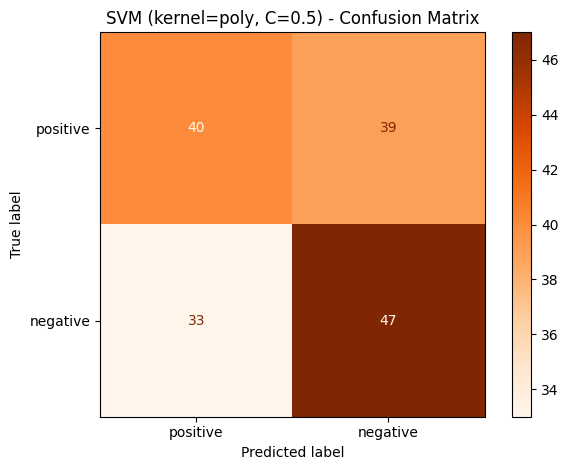


=== SVM (kernel=poly, C=1) ===
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

    negative       0.55      0.64      0.59        80
    positive       0.56      0.47      0.51        79

    accuracy                           0.55       159
   macro avg       0.55      0.55      0.55       159
weighted avg       0.55      0.55      0.55       159



<Figure size 600x500 with 0 Axes>

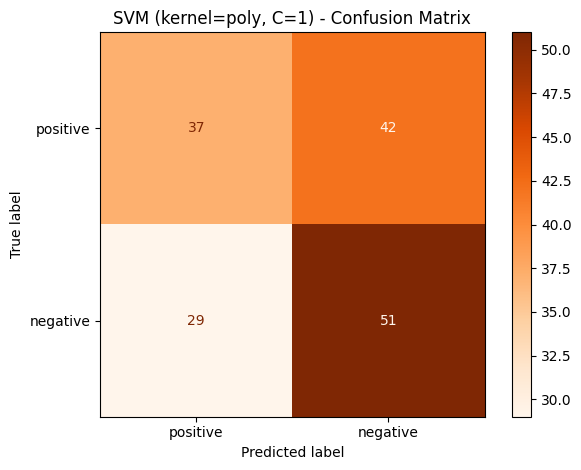

In [41]:
kernel_cost_combinations = [

    ("linear", 0.1),
    ("linear", 0.5),
    ("linear", 1),
    ("rbf", 0.05),
    ("rbf", 0.1),
    ("rbf", 0.5),
    ("rbf", 1),
    ("poly", 0.05),
    ("poly", 0.1),
    ("poly", 0.5),
    ("poly", 1),
]

# Train and Evaluate
for kernel, C in kernel_cost_combinations:
    clf = SVC(kernel=kernel, C=C, probability=True, random_state=42)
    clf.fit(Xsent_train_tfidf, y_train)
    y_pred = clf.predict(Xsent_test_tfidf)

    acc = accuracy_score(y_test, y_pred)

    print(f"\n=== SVM (kernel={kernel}, C={C}) ===")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
    plt.figure(figsize=(6, 5))
    disp.plot(cmap="Oranges", values_format="d")
    plt.title(f"SVM (kernel={kernel}, C={C}) - Confusion Matrix")
    plt.tight_layout()
    plt.show()
